In [2]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import requests
import operator

In [3]:
bad_user_tweets_analysis_json = {}

In [1]:
# Json path
json_path = '../../data/bad_user_tweets.json'

In [5]:
# Open json file
bad_user_tweets_file = open(json_path, 'r')
# Load json file
bad_user_tweets = json.load(bad_user_tweets_file)

In [7]:
print("Number of bad tweets: ", len(bad_user_tweets['IWTSeller']))

Number of bad tweets:  66


In [8]:
number_of_bad_tweets_per_user = {}
for tweet in bad_user_tweets['IWTSeller']:
	user_id = tweet['user']
	# Check if user id in in the number_of_bad_tweets_per_user dictionary
	if user_id in number_of_bad_tweets_per_user:
		# If user id is in the dictionary, increment the value
		number_of_bad_tweets_per_user[user_id] += 1
	else:
		# If user id is not in the dictionary, add it with value 1
		number_of_bad_tweets_per_user[user_id] = 1
	

In [9]:
print("Number of bad tweets per user: ", number_of_bad_tweets_per_user)

Number of bad tweets per user:  {'47297687': 64, '717712395112751104': 2}


In [16]:
search_words = ["trophy", "skin"
                "fur",
                "dragon",
                "pelt",
                "tusk",
                "ivory",
                "scale",
                "taxidermy",
                "rug",
                "hide",
                "bone",
                "meat",
                "delicacy",
                "medicine",
                "live",
                "pangolin",
                "leopard",
                "rhino",
                "sungazer",
                "lizard",
                "crocodile",
                "alligator",
                "parrot",
                "snake",
                "python",
                "yellow material",
                "white plastic",
                "jelly",
                "aloo",
                "kola",
                "australian teddy bear",
                "stripped t-shirt",
                "four wheeler",
                "antique",
                "mammoth",
                "carved",
                "sale",
                "selling",
                "price",
                "xiangya",
                "african material",
                "ANTEBELLUMELEG1"]
suspicious_tweets_word_list = []
tweets_with_search_words = []
suspicious_tweets_word_count = {}
suspicious_tweet_count = 0
total_tweets_count = 0
followers = 0
for word in search_words:
    suspicious_tweets_word_count[word] = 0


for tweet in bad_user_tweets['IWTSeller']:
    print(tweet)
    try:
        tweet_text = tweet['tweet']
        tweet_id = tweet['id']
        tweet_suspicious = False
        bad_tweet = {}
        total_tweets_count += 1
        for search_word in search_words:
            if search_word in tweet_text.lower():
                # print(tweet_text)

                
                bad_tweet['user'] = tweet['user']
                bad_tweet['tweet'] = tweet_text
                bad_tweet['id'] = tweet_id
                
                if tweet_suspicious == False:
                    bad_tweet['suspicious_word'] = [search_word]
                    suspicious_tweets_word_list.append([search_word])
                    suspicious_tweet_count += 1
                else:
                    suspicious_tweets_word_list[-1].append(search_word)
                    bad_tweet['suspicious_word'].append(search_word)
                tweet_suspicious = True
                suspicious_tweets_word_count[search_word] += 1
        # If bad tweet is not empty
        if len(bad_tweet) > 0:
            tweets_with_search_words.append(bad_tweet)
    except:
        pass
    #     # Print the error


{'user': '47297687', 'tweet': 'Mammoth Ivory Carvings Figurine of Japanese Samurai\n\nLook at this mighty yet robust creation of Japanese Samurai Figurines on a Wooden platform precisely sculpted with original mammoth ivory.\n\nhttps://t.co/kbjbZ65Mrf https://t.co/xRZQLBdzDZ', 'id': '1218189939214573568'}
{'user': '47297687', 'tweet': 'Mammoth Ivory Netsuke – 12 zodiac animals set – Round Stand\n\nThis is a very high quality mammoth ivory carving netsukes of 12 Chinese Zodiac animals Set!\n\nCheck the link: https://t.co/sjc9zvWslb https://t.co/ZhIyx7QkOm', 'id': '1217409087597662208'}
{'user': '47297687', 'tweet': 'Mammoth Ivory Masterpiece Netsuke – Father &amp; Son with a Fish\nThe relationship between father and son is a classic and timeless relationship worthy of artistic interpretation.\n\nhttps://t.co/6V9gHq54kk\n\n#masterpiece #sculpture #art https://t.co/NiJygsdnir', 'id': '1215217584943063041'}
{'user': '47297687', 'tweet': 'Mammoth Ivory Figurine -The New archery samurai knee

In [17]:
print("Suspicious tweet count: ", suspicious_tweet_count)
# print("Total followers: ", followers)
print("Total tweets: ", total_tweets_count)
# print("Average tweets per follower: ", total_tweets_count/followers)
print("Percentage of suspicious tweets: ", (suspicious_tweet_count/total_tweets_count)*100)

Suspicious tweet count:  66
Total tweets:  66
Percentage of suspicious tweets:  100.0


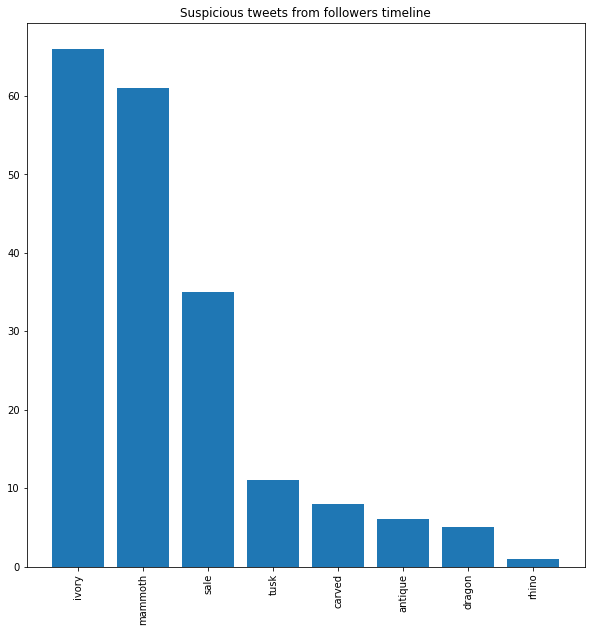

In [18]:
# Sort suspicious_tweets_word_count
suspicious_tweets_word_count_sorted = sorted(suspicious_tweets_word_count.items(), key=operator.itemgetter(1), reverse=True)
# Remove the items with 0 count
suspicious_tweets_word_count_sorted = [x for x in suspicious_tweets_word_count_sorted if x[1] > 0]
# Make a chart of suspicious_tweets_word_count_sorted with names of the search words in bar
# Make the chart wider
plt.figure(figsize=(10,10))
plt.bar(range(len(suspicious_tweets_word_count_sorted)), [x[1] for x in suspicious_tweets_word_count_sorted], align='center')
plt.xticks(range(len(suspicious_tweets_word_count_sorted)), [x[0] for x in suspicious_tweets_word_count_sorted], rotation=90)
plt.title("Suspicious tweets from followers timeline")
plt.show()